In [171]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The equation for the damped pendulum is $$ \frac{d ^2\theta}{dt} + \frac{b}{m} \frac{d \theta}{dt} + \frac{g}{l} \sin \theta = 0.$$

Defining $y(t) = \theta'(t)$, we get the system
$$ y'(t) = -\frac{b}{m} y(t) - \frac{g}{l} \sin \theta,$$
$$ \theta'(t) = y(t).$$

In [193]:
#define function for RHS
b = 0.1
l = 2.5
g = 9.81
m = 0.25

RHS = lambda t,x: [-b/m * x[0] - g/l*math.sin(x[1]), x[0]]

In [516]:
#y0=[-4.283866414839002,math.pi/1.05] stops at the top
solution = solve_ivp(fun=RHS, y0=[-4.283866414838997,math.pi/1.05], t_span=[0,25], max_step=0.001, method="RK45", first_step = 0.001)

/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ivp/common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `first_step`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


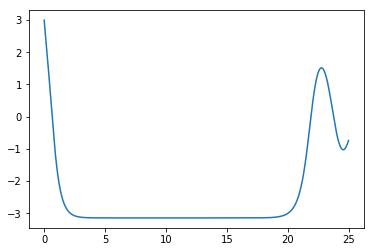

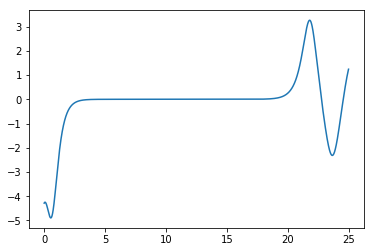

In [517]:
plt.plot(solution.t, (solution.y[1,:]))
plt.show()
plt.plot(solution.t, solution.y[0,:])
plt.show()

(-2.749997820495716,
 2.750002122246412,
 -2.7499999453447583,
 2.7499999973973694)

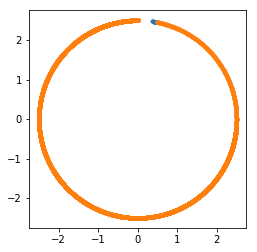

In [518]:
plt.plot(l*np.sin(solution.y[1,0:10]),-l*np.cos(solution.y[1,0:10]),'.')
plt.plot(l*np.sin(solution.y[1,10:]),-l*np.cos(solution.y[1,10:]),'.')
plt.axis("square")

2.5


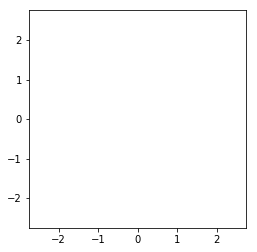

In [514]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True, fillstyle='none', alpha=0.5)
arr, = plt.plot([],[],'ro-', animated = True)
print(l)
def init():
    ax.axis("square")
    ax.set_xlim(-l*1.1, l*1.1)
    ax.set_ylim(-l*1.1,l*1.1)
    return ln,

def update(frame):
    xdata.append(l*np.sin(solution.y[1,frame*150]))
    ydata.append(-l*np.cos(solution.y[1,frame*150]))
    arr.set_data([0,l*np.sin(solution.y[1,frame*150])],[0,-l*np.cos(solution.y[1,frame*150])])
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.arange(0,solution.t.size//150),
                    init_func=init, blit=True)
plt.show()


In [515]:
HTML(ani.to_html5_video())

In [526]:
chi = np.array([0.575,0.425,0,0])
sigma_a = np.array([0.0049,0.0028,0.0305,0.1210]) 
nuSigma_f = np.array([0.0096,0.0012,0.0177,0.1851])
sigma_s_downscatter = np.array([0.0831,0.0585,0.0651,0])

A = np.zeros((4,4))
A[0,:] = [sigma_a[0] + sigma_s_downscatter[0], 0,0,0]
A[1,:] = [-sigma_s_downscatter[0], sigma_a[1] + sigma_s_downscatter[1],0,0]
A[2,:] = [0,-sigma_s_downscatter[1], sigma_a[2] + sigma_s_downscatter[2],0]
A[3,:] = [0,0,-sigma_s_downscatter[2], sigma_a[3] + sigma_s_downscatter[3]]

F = np.zeros((4,4))
F[0,:] = chi[0]*nuSigma_f
F[1,:] = chi[1]*nuSigma_f
F[2,:] = chi[2]*nuSigma_f
F[3,:] = chi[3]*nuSigma_f

np.linalg.eig(a = np.dot(np.linalg.inv(A),F))

(array([1.21500162e+00, 2.58800503e-17, 9.86912596e-18, 1.21430643e-17]),
 array([[ 0.32173778,  0.14905715,  0.24999613,  0.23514893],
        [ 0.77754248,  0.98477599,  0.96474823,  0.96956027],
        [ 0.47579744,  0.08658348,  0.07779507,  0.06367246],
        [ 0.25598689, -0.02239442, -0.02665928, -0.02456999]]))

In [527]:
print(A)
print(F)
print(chi[0]*nuSigma_f[0])

[[ 0.088   0.      0.      0.    ]
 [-0.0831  0.0613  0.      0.    ]
 [ 0.     -0.0585  0.0956  0.    ]
 [ 0.      0.     -0.0651  0.121 ]]
[[0.00552   0.00069   0.0101775 0.1064325]
 [0.00408   0.00051   0.0075225 0.0786675]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]]
0.005519999999999999


In [186]:
import numpy as np
def inversePower(I,A,B,groups,epsilon=1.0e-6):
    ''' Solve the generalized eigenvalue problem 
    Ax = (1/k)Bx using inverse power iteration
    Inputs:
        I: the number of cells, (I+1) = N
        A: left-side (groups*N)x(groups*N) matrix
        B: right-side (groups*N)x(groups*N) matrix
        groups: for dimensional purposes 
    Outputs:
        l_new: the smallest eigenvalue of the problem
        phi: the associated eigenvector, broken up into Nxgroups matrix
    '''
    assert(A.shape == B.shape)
    
    # Initial Guess of x0
    x0 = []
    for i in range(groups*(I+1)):
        i = np.random.random()
        x0 = np.append(x0,i)

    # Normalize x0
    l_old = np.linalg.norm(x0)
    x0 /= l_old

    converged = 0 
    iteration = 1
    while not(converged):
        x1 = np.linalg.solve(A,np.dot(B,x0))
        l_new = np.linalg.norm(x1)/np.linalg.norm(x0)
        x1 = x1/np.linalg.norm(x1)
        converged = (np.fabs(l_new-l_old) < epsilon)
        x0 = x1
        l_old = l_new
        print('Iteration:',iteration,'\tMagnitude of l',l_new)
        iteration += 1
    phi = np.reshape(x1,(I+1,groups),order='F')
    return phi, l_new

In [188]:
inversePower(0,A,F,4)

Iteration: 1 	Magnitude of l 0.7478190984876885
Iteration: 2 	Magnitude of l 0.6075008116255057
Iteration: 3 	Magnitude of l 0.6075008116255058


(array([[0.32173778, 0.77754248, 0.47579744, 0.25598689]]), 0.6075008116255058)

In [519]:
1/0.6075008116255058

1.6460883357904885